In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectKBest,chi2,f_regression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import Ploynomial
# from sklearn. import PCA

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

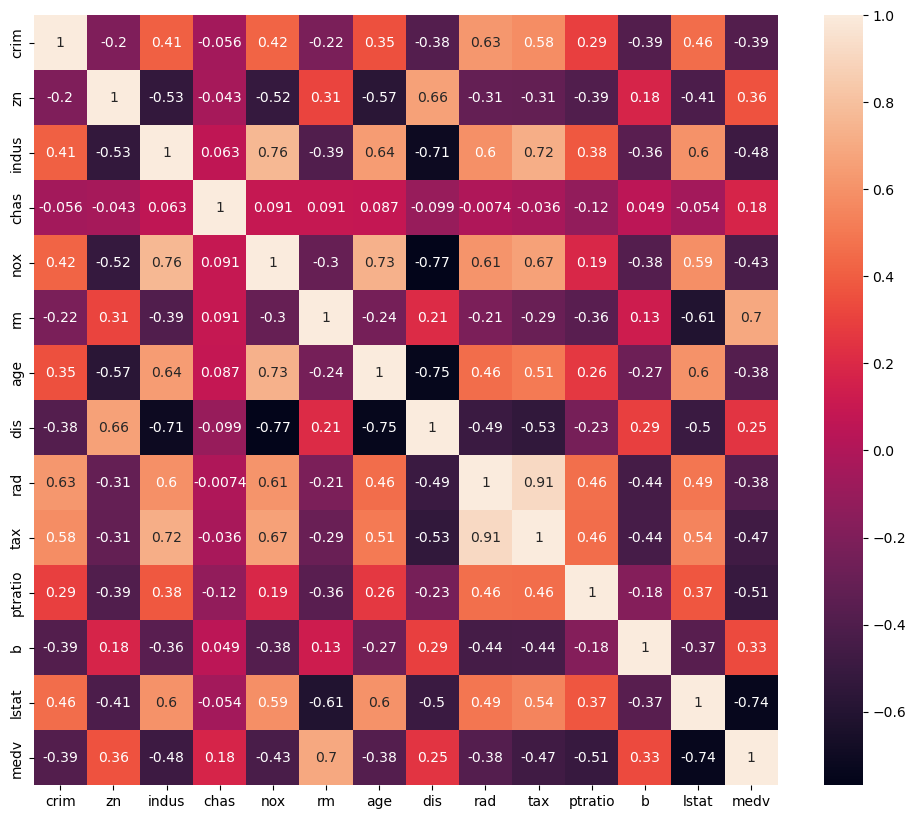

In [5]:
correlation=df.corr()
fig=plt.figure(figsize=(12,10))
sns.heatmap(data=correlation,annot=True)
plt.show()

1. b – the "Black" index
Reason: This variable is often considered problematic or ethically questionable to include in models due to its racial implications. It also rarely adds much predictive value when combined with lstat.

2. zn
Reason: Often has very little variance (most values are 0) and doesn't correlate strongly with medv.

3. indus or tax
Reason: These are often highly correlated with nox and rad, which can cause multicollinearity. You might drop one of them based on a correlation heatmap or VIF analysis.

4. rad
Reason: It's an index (categorical in disguise), and highly correlated with tax.

Keep These:
rm – Strong positive correlation with medv.

lstat – Strong negative correlation with medv.

ptratio, nox, and dis – often relevant in explaining housing prices.

chas – Binary variable; may help with certain models due to its significance for river proximity.

In [7]:
df.drop("tax",axis=1,inplace=True)

In [8]:
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
# df.drop(columns=["dis"],inplace=True)

In [10]:
# df.drop(columns=["age","rad","crim"],inplace=True)

In [11]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,15.2,386.71,17.10,18.9


In [12]:
df.drop("b",axis=1,inplace=True)

In [13]:
# sns.pairplot(x=df["medv"],y=df.columns)

In [14]:
scale=StandardScaler()
scale.fit_transform(df)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.66905833, -1.15724782]])

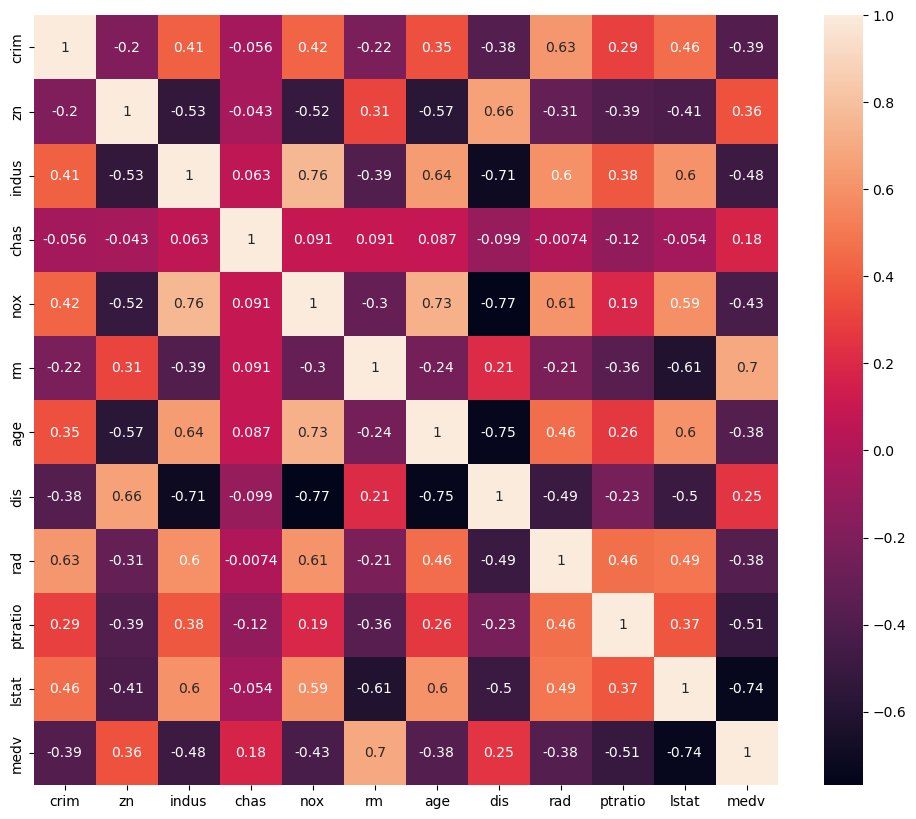

In [15]:
correlation=df.corr()
fig=plt.figure(figsize=(12,10))
sns.heatmap(data=correlation,annot=True)
plt.show()

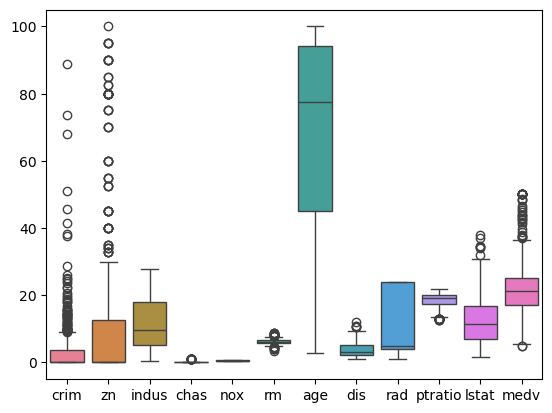

In [16]:
sns.boxplot(df)
plt.show()

In [17]:
for i in df.columns:
    skew=df[i].skew().round()
    if i=="chas":
        continue
    elif skew==0:
        mean=df[i].mean()
        standard=df[i].std()
        lower=mean-3*standard
        upper=mean+3*standard
    else:
        q1,q3=df[i].quantile([0.25,0.75])
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
    # df[i]=df[i].clip(lower=lower,upper=upper)
    df[i]=df[i].map(lambda x:lower if x<lower else upper if x>upper else x)

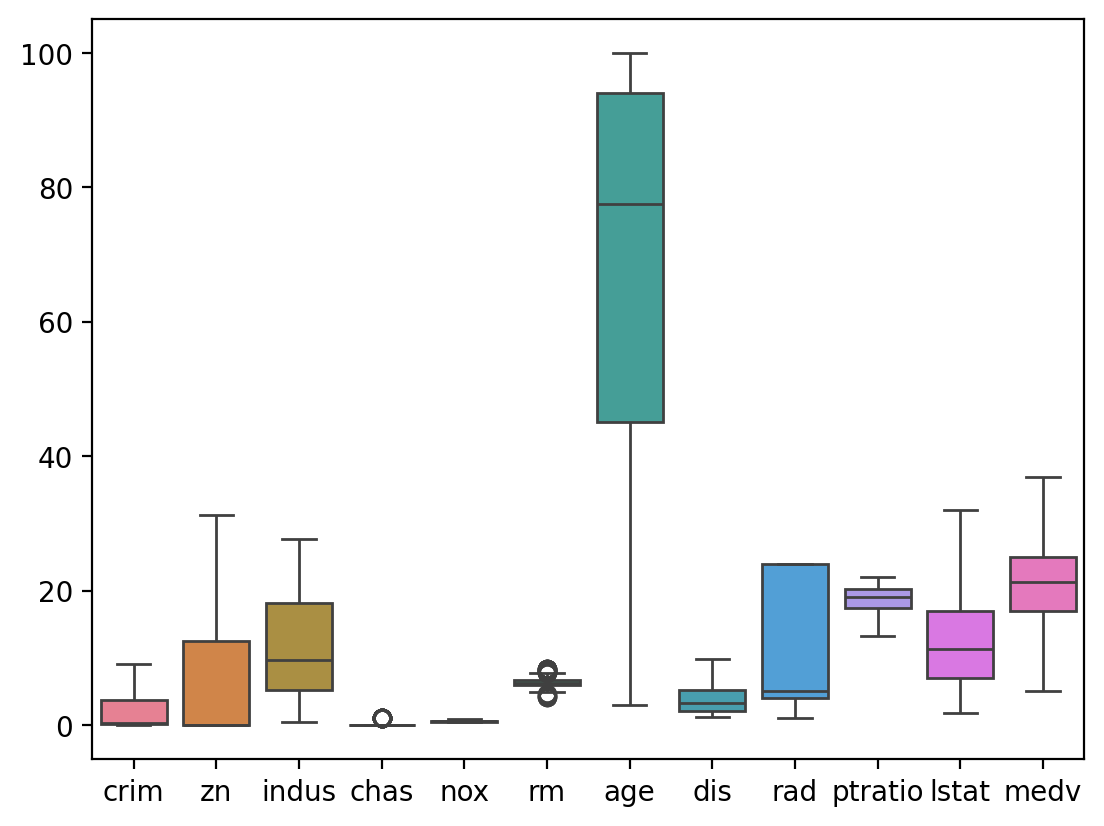

In [18]:
fig=plt.figure(dpi=200)
sns.boxplot(df)
plt.show()

In [19]:
correlation=df.corr()

In [20]:
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,lstat,medv
crim,1.000000,-0.370213,0.629315,-0.030748,0.663412,-0.265417,0.518951,-0.555054,0.926977,0.416269,0.592587,-0.538589
zn,-0.370213,1.000000,-0.584079,-0.038059,-0.549670,0.337015,-0.583149,0.681019,-0.344043,-0.432409,-0.448131,0.428126
indus,0.629315,-0.584079,1.000000,0.062938,0.763651,-0.395876,0.644779,-0.713079,0.595129,0.382359,0.608158,-0.561174
chas,-0.030748,-0.038059,0.062938,1.000000,0.091203,0.088672,0.086518,-0.099435,-0.007368,-0.123763,-0.053288,0.146061
nox,0.663412,-0.549670,0.763651,0.091203,1.000000,-0.306668,0.731470,-0.775934,0.611441,0.190159,0.595619,-0.506505
rm,-0.265417,0.337015,-0.395876,0.088672,-0.306668,1.000000,-0.244137,0.211791,-0.210343,-0.355973,-0.620762,0.686879
age,0.518951,-0.583149,0.644779,0.086518,0.731470,-0.244137,1.000000,-0.753333,0.456022,0.263355,0.606711,-0.458662
dis,-0.555054,0.681019,-0.713079,-0.099435,-0.775934,0.211791,-0.753333,1.000000,-0.500007,-0.238556,-0.502644,0.333079
rad,0.926977,-0.344043,0.595129,-0.007368,0.611441,-0.210343,0.456022,-0.500007,1.000000,0.466698,0.489186,-0.452679
ptratio,0.416269,-0.432409,0.382359,-0.123763,0.190159,-0.355973,0.263355,-0.238556,0.466698,1.000000,0.376433,-0.523993


In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,6.48


In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [25]:
multi=LinearRegression()
multi.fit(x_train,y_train)

LinearRegression()

In [26]:
multi.intercept_

42.062061199472254

In [27]:
multi.coef_

array([-6.54227222e-01,  4.53324266e-02, -8.54874208e-02,  4.07608319e-01,
       -1.71893685e+01,  2.62473124e+00, -7.73925281e-03, -1.28177552e+00,
        2.19926069e-01, -8.72996215e-01, -4.44586988e-01])

In [29]:
y_pred=multi.predict(x_test)

In [30]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("re",r2)
print("mse",mse)
print("mae",mae)

re 0.7771555678941817
mse 11.64057229016947
mae 2.5890825545301213


In [62]:
y_trial=multi.predict(x_train)

In [64]:
mse=mean_squared_error(y_trial,y_train)
r2=r2_score(y_trial,y_train)
mae=mean_absolute_error(y_trail,y_train)
print("re",r2)
print("mse",mse)
print("mae",mae)

NameError: name 'y_trail' is not defined

In [ ]:
multi.score(x,y)

In [ ]:
cross=cross_val_score(multi,x,y)
cross.mean()

In [ ]:
cross_test=cross_val_score(multi,x_test,y_test)
cross_test.mean()

In [ ]:
cross_test=cross_val_score(multi,x_train,y_train)
cross_test.mean()

In [ ]:
residual=y_test-y_pred
sns.displot(residual,kind="kde")
plt.grid()
plt.show()

From the above data we are good results with training data and testing data but getting poor result with the whole data from this we concluded that model getting overfitting so avoid this we are using the lasso,ridge,elasticnet

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

In [ ]:
lasso.score(x,y)

In [ ]:
lasso.score(x_train,y_train)

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("re",r2)
print("mse",mse)
print("mae",mae)

In [ ]:
cross=cross_val_score(ridge,x,y)
cross.mean()

In [ ]:
residual=y_test-y_pred
sns.displot(residual,kind="kde")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

In [ ]:
y_pred=ridge.predict(x_test)

In [ ]:
ridge.score(x,y)

In [ ]:
ridge.score(x_train,y_train)

In [ ]:
ridge.score(x_test,y_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)
print("rmse:",rmse)

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)

In [ ]:
y_pred=elastic.predict(x_test)

In [ ]:
# y_prob=elastic.predict_proba(x_test)

In [ ]:
elastic.score(x,y)

In [ ]:
elastic.score(x_train,y_train)

In [ ]:
elastic.score(x_test,y_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse:",round(mse,2))
print("mae:",round(mae,2))
print("r2:",round(r2,2))
print("rmse:",round(rmse,2))

In [ ]:
reg=y_test-y_pred
sns.displot(reg,kind="kde")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='pink')
plt.plot(y_test,y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
cross=cross_val_score(elastic,x,y,cv=3)
cross.mean()

In [377]:
# from sklearn.preprocessing import PloynomialFeature